In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns

from datetime import datetime

from sklearn.model_selection import train_test_split


import warnings 
warnings.filterwarnings('ignore')

In [2]:
def delivery_partners(df, given_info, total_onshift_partners = False, total_busy_partners = False, total_outstanding_orders = False):
    if (total_onshift_partners == True):
        total_onshift_partners = given_info[(given_info.created_at_weekday == df.created_at_weekday) & (given_info.created_at_hour == df.created_at_hour)]["total_onshift_partners"]
        return total_onshift_partners.iloc[0]
    if (total_busy_partners == True):
        total_busy_partners = given_info[(given_info.created_at_weekday == df.created_at_weekday) & (given_info.created_at_hour == df.created_at_hour)]["total_busy_partners"]
        return total_busy_partners.iloc[0]
    if (total_outstanding_orders == True):
        total_outstanding_orders = given_info[(given_info.created_at_weekday == df.created_at_weekday) & (given_info.created_at_hour == df.created_at_hour)]["total_outstanding_orders"]
        return total_outstanding_orders.iloc[0]
    return "atleast choose one"

In [3]:
def order_protocol_value(df, given_info):
   
    order_protocol = given_info[(given_info.created_at_weekday == df.created_at_weekday) & (given_info.market_id == df.market_id)]["order_protocol"]
    return order_protocol.iloc[0]
    

In [4]:
df = pd.read_csv("../datasets/dataset.csv")

In [5]:
# df.market_id = df.market_id.astype("category")
# df.order_protocol = df.order_protocol.astype("category")
# df.store_primary_category = df.store_primary_category.astype("category")

In [6]:
df.dropna(subset = ["actual_delivery_time"], inplace = True)
df["created_at"] = pd.to_datetime(df.created_at)
df["actual_delivery_time"] = pd.to_datetime(df.actual_delivery_time)
df["created_at_month"] = df.created_at.dt.month_name()
df["created_at_weekday"] = df.created_at.dt.day_name()
df["created_at_hour"] = df.created_at.dt.hour
df["actual_delivery_month"] = df.actual_delivery_time.dt.month_name()
df["actual_deliveryt_weekday"] = df.actual_delivery_time.dt.day_name()
df["actual_delivery_hour"] = df.actual_delivery_time.dt.hour
df["delivery_time"] = (df["actual_delivery_time"] - df["created_at"]).dt.total_seconds()/60

In [7]:
X = df.drop(["delivery_time"], axis = 1)
y = df["delivery_time"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)

print(f"the shape of train data : ")
print(f"   X_train = {X_train.shape}\n   y_train = {y_train.shape}")
print("--" * 20)
print(f"the shape of test data : ")
print(f"   X_test = {X_test.shape}\n   y_test = {y_test.shape}")
print("--" * 60)

the shape of train data : 
   X_train = (157936, 20)
   y_train = (157936,)
----------------------------------------
the shape of test data : 
   X_test = (39485, 20)
   y_test = (39485,)
------------------------------------------------------------------------------------------------------------------------


#### plots before impuation

##### plot 1

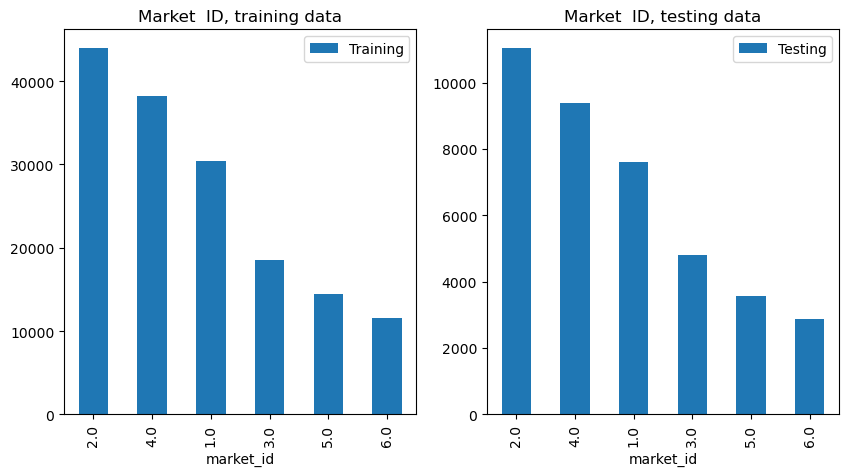

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

X_train.market_id.value_counts().plot(kind = "bar", ax=ax[0], label='Training')
ax[0].legend()
ax[0].set_title("Market  ID, training data")
X_test.market_id.value_counts().plot(kind = "bar", ax=ax[1], label='Testing')
ax[1].legend()
ax[1].set_title("Market  ID, testing data")
plt.show()

##### plot 2

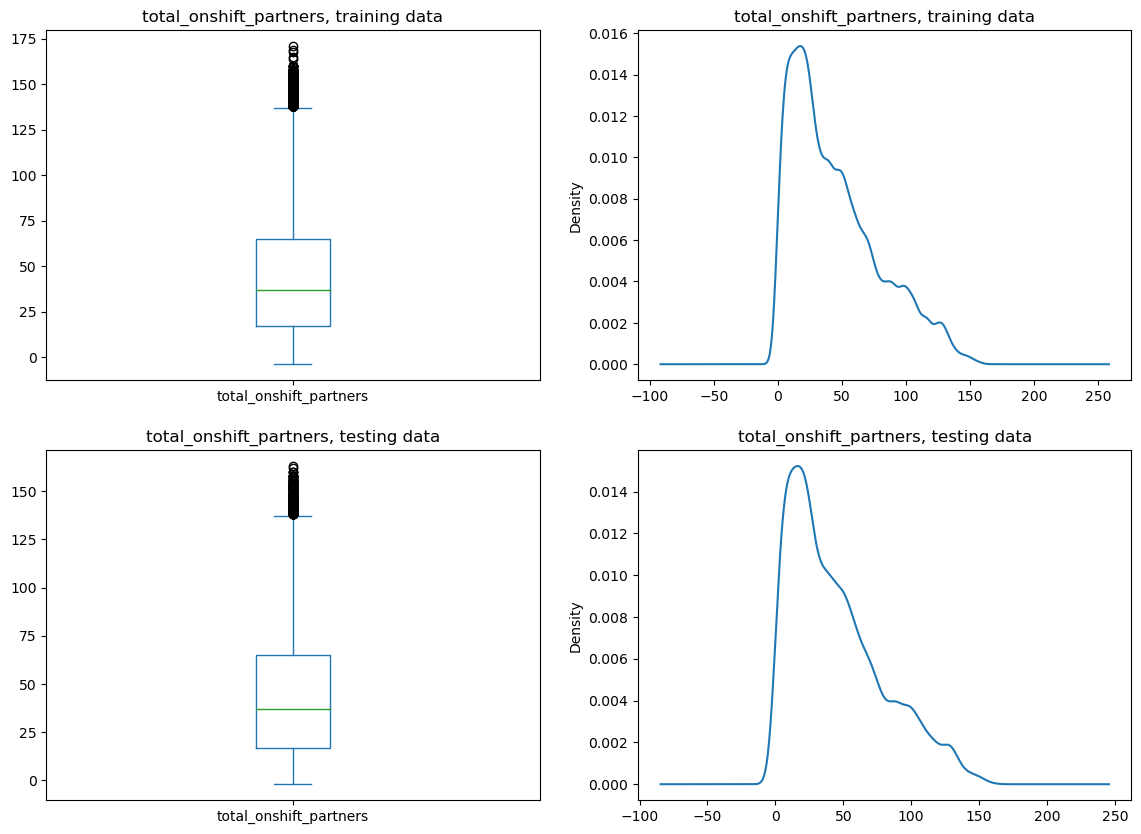

In [9]:
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

X_train.total_onshift_partners.plot(kind = "box", ax=ax[0][0])
ax[0][0].set_title("total_onshift_partners, training data")
X_test.total_onshift_partners.plot(kind = "box", ax=ax[1][0])
ax[1][0].set_title("total_onshift_partners, testing data")

X_train.total_onshift_partners.plot(kind = "kde", ax=ax[0][1])
ax[0][1].set_title("total_onshift_partners, training data")
X_test.total_onshift_partners.plot(kind = "kde", ax=ax[1][1])
ax[1][1].set_title("total_onshift_partners, testing data")
plt.show()

##### plot 3

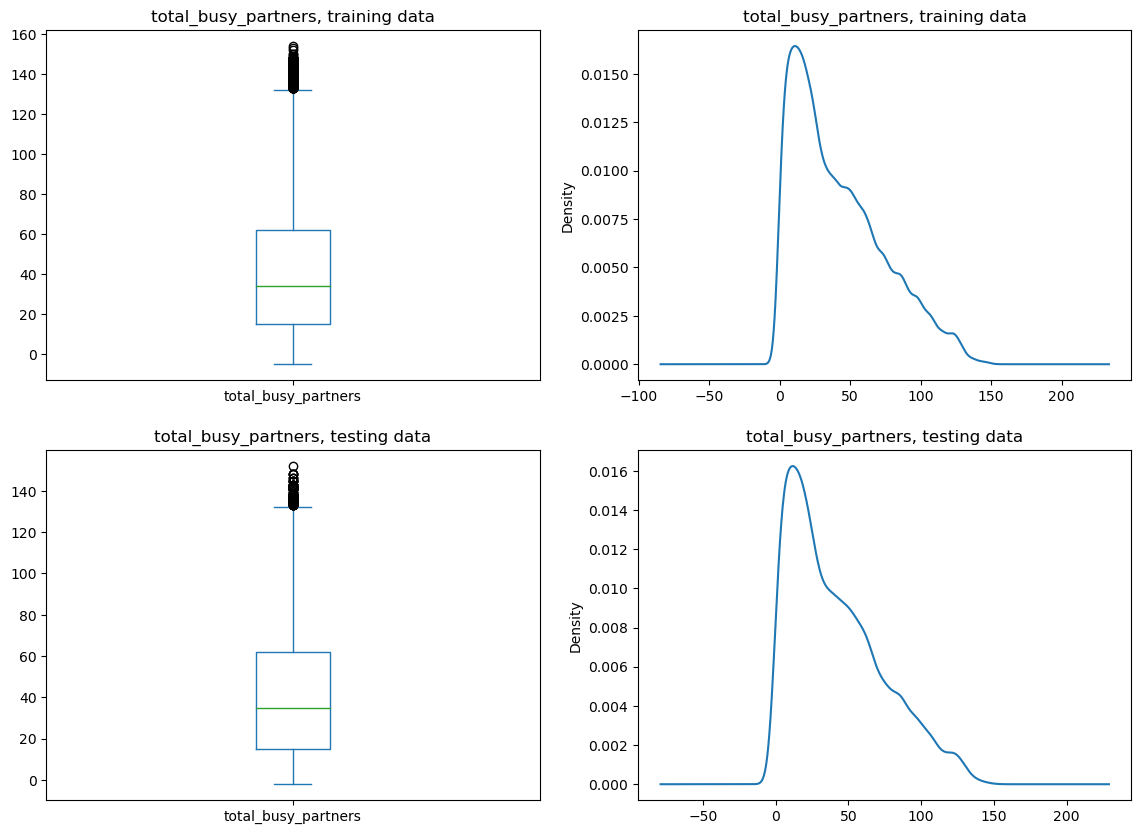

In [10]:
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

X_train.total_busy_partners.plot(kind = "box", ax=ax[0][0])
ax[0][0].set_title("total_busy_partners, training data")
X_test.total_busy_partners.plot(kind = "box", ax=ax[1][0])
ax[1][0].set_title("total_busy_partners, testing data")

X_train.total_busy_partners.plot(kind = "kde", ax=ax[0][1])
ax[0][1].set_title("total_busy_partners, training data")
X_test.total_busy_partners.plot(kind = "kde", ax=ax[1][1])
ax[1][1].set_title("total_busy_partners, testing data")
plt.show()

##### plot 4

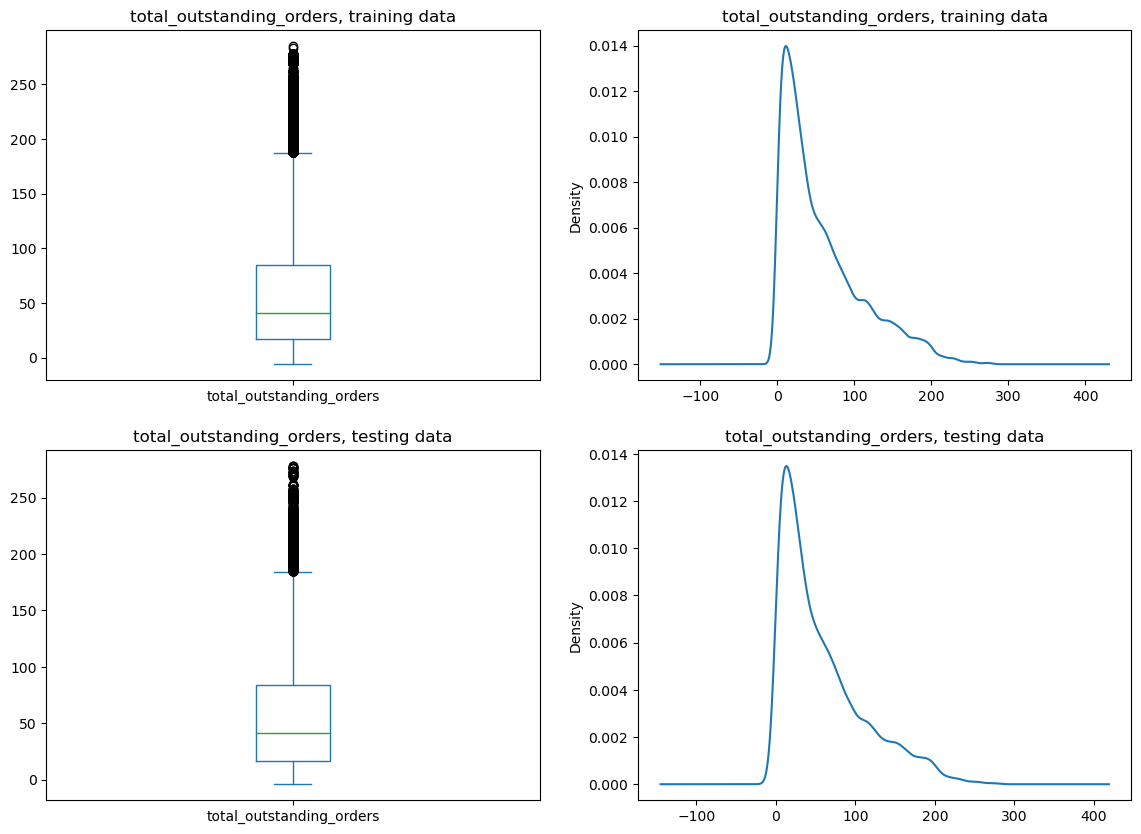

In [11]:
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

X_train.total_outstanding_orders.plot(kind = "box", ax=ax[0][0])
ax[0][0].set_title("total_outstanding_orders, training data")
X_test.total_outstanding_orders.plot(kind = "box", ax=ax[1][0])
ax[1][0].set_title("total_outstanding_orders, testing data")

X_train.total_outstanding_orders.plot(kind = "kde", ax=ax[0][1])
ax[0][1].set_title("total_outstanding_orders, training data")
X_test.total_outstanding_orders.plot(kind = "kde", ax=ax[1][1])
ax[1][1].set_title("total_outstanding_orders, testing data")
plt.show()

#### impuattion

In [12]:
most_market_id = X_train.market_id.value_counts().index[0]
market_id_map = X_train.groupby('store_id')['market_id'].apply(lambda x: x.mode()[0] if not x.isnull().all() else most_market_id).reset_index()

In [13]:
def market_map(df, given_info, most_market_id):
    required_data = given_info[(given_info.store_id == df.store_id)]["market_id"]
    if required_data.shape[0] > 0:
        return required_data.iloc[0]
    return most_market_id    

In [14]:
X_train.loc[X_train.market_id.isna(), "market_id"] = X_train.loc[X_train.market_id.isna()].apply(market_map, given_info = market_id_map, most_market_id = most_market_id, axis = 1)
print(f"missing values in X_train")
display(X_train.loc[:,["market_id"]].isna().sum())
print("--" * 60)

X_test.loc[X_test.market_id.isna(), "market_id"] = X_test.loc[X_test.market_id.isna()].apply(market_map, given_info = market_id_map, most_market_id = most_market_id, axis = 1)
print(f"missing values in X_test")
display(X_test.loc[:,["market_id"]].isna().sum())
print("--" * 60)

missing values in X_train


market_id    0
dtype: int64

------------------------------------------------------------------------------------------------------------------------
missing values in X_test


market_id    0
dtype: int64

------------------------------------------------------------------------------------------------------------------------


In [15]:

delivery_partners_grps = X_train.groupby(by = ["created_at_weekday", "created_at_hour"])[["total_onshift_partners", "total_busy_partners", "total_outstanding_orders"]].apply("mean").round().reset_index()
delivery_partners_grps


,created_at_weekday,created_at_hour,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,Friday,0,26.0,20.0,22.0
1,Friday,1,58.0,48.0,62.0
2,Friday,2,76.0,62.0,93.0
3,Friday,3,71.0,60.0,89.0
4,Friday,4,46.0,41.0,49.0
...,...,...,...,...,...
118,Wednesday,19,34.0,32.0,48.0
119,Wednesday,20,37.0,35.0,47.0
120,Wednesday,21,27.0,23.0,28.0
121,Wednesday,22,17.0,15.0,17.0


In [16]:
X_train.loc[X_train.total_onshift_partners.isna(), "total_onshift_partners"] = X_train.loc[X_train.total_onshift_partners.isna()].apply(delivery_partners, given_info = delivery_partners_grps, total_onshift_partners = True, axis = 1)
X_train.loc[X_train.total_busy_partners.isna(), "total_busy_partners"] = X_train.loc[X_train.total_busy_partners.isna()].apply(delivery_partners, given_info = delivery_partners_grps, total_busy_partners = True, axis = 1)
X_train.loc[X_train.total_outstanding_orders.isna(), "total_outstanding_orders"] = X_train.loc[X_train.total_outstanding_orders.isna()].apply(delivery_partners, given_info = delivery_partners_grps, total_outstanding_orders = True, axis = 1)
print(f"missing values in X_train")
display(X_train.loc[:,["total_onshift_partners", "total_busy_partners", "total_outstanding_orders"]].isna().sum())
print("--" * 60)

X_test.loc[X_test.total_onshift_partners.isna(), "total_onshift_partners"] = X_test.loc[X_test.total_onshift_partners.isna()].apply(delivery_partners, given_info = delivery_partners_grps, total_onshift_partners = True, axis = 1)
X_test.loc[X_test.total_busy_partners.isna(), "total_busy_partners"] = X_test.loc[X_test.total_busy_partners.isna()].apply(delivery_partners, given_info = delivery_partners_grps, total_busy_partners = True, axis = 1)
X_test.loc[X_test.total_outstanding_orders.isna(), "total_outstanding_orders"] = X_test.loc[X_test.total_outstanding_orders.isna()].apply(delivery_partners, given_info = delivery_partners_grps, total_outstanding_orders = True, axis = 1)
print(f"missing values in X_test")
display(X_test.loc[:,["total_onshift_partners", "total_busy_partners", "total_outstanding_orders"]].isna().sum())
print("--" * 60)

missing values in X_train


total_onshift_partners      0
total_busy_partners         0
total_outstanding_orders    0
dtype: int64

------------------------------------------------------------------------------------------------------------------------
missing values in X_test


total_onshift_partners      0
total_busy_partners         0
total_outstanding_orders    0
dtype: int64

------------------------------------------------------------------------------------------------------------------------


In [17]:
print(f"remaining missing valued features (train_data) = {X_train.columns[X_train.isna().sum() > 0].tolist()}")
print("--" * 50)
print(f"remaining missing valued features (test_data) = {X_test.columns[X_test.isna().sum() > 0].tolist()}")
print("--" * 60)

remaining missing valued features (train_data) = ['store_primary_category', 'order_protocol']
----------------------------------------------------------------------------------------------------
remaining missing valued features (test_data) = ['store_primary_category', 'order_protocol']
------------------------------------------------------------------------------------------------------------------------


In [18]:
order_protocol_grps = df.groupby(by = ["created_at_weekday", "market_id"])["order_protocol"].apply(lambda x : x.mode()[0]).reset_index()
order_protocol_grps

,created_at_weekday,market_id,order_protocol
0,Friday,1.0,1.0
1,Friday,2.0,3.0
2,Friday,3.0,1.0
3,Friday,4.0,3.0
4,Friday,5.0,1.0
5,Friday,6.0,3.0
6,Monday,1.0,1.0
7,Monday,2.0,3.0
8,Monday,3.0,1.0
9,Monday,4.0,3.0


In [19]:
X_train.loc[X_train.order_protocol.isna(), "order_protocol"] = X_train.loc[X_train.order_protocol.isna()].apply(order_protocol_value, given_info = order_protocol_grps, axis = 1)
X_test.loc[X_test.order_protocol.isna(), "order_protocol"] = X_test.loc[X_test.order_protocol.isna()].apply(order_protocol_value, given_info = order_protocol_grps, axis = 1)

In [20]:
print(f"remaining missing valued features (train_data) = {X_train.columns[X_train.isna().sum() > 0].tolist()}")
print("--" * 50)
print(f"remaining missing valued features (test_data) = {X_test.columns[X_test.isna().sum() > 0].tolist()}")
print("--" * 60)

remaining missing valued features (train_data) = ['store_primary_category']
----------------------------------------------------------------------------------------------------
remaining missing valued features (test_data) = ['store_primary_category']
------------------------------------------------------------------------------------------------------------------------


In [21]:
x = X_train.groupby(by = ["created_at_hour", "created_at_weekday", "store_primary_category", "market_id", "store_id"])[["subtotal"]].apply("mean").reset_index()
x.head(10)

,created_at_hour,created_at_weekday,store_primary_category,market_id,store_id,subtotal
0,0,Friday,alcohol,1.0,cd882239782e46c81f650fc5a6136d2e,12993.000000
1,0,Friday,alcohol,2.0,248e844336797ec98478f85e7626de4a,4100.000000
2,0,Friday,alcohol,2.0,379a7ba015d8bf1c70b8add2c287c6fa,3990.000000
3,0,Friday,alcohol,2.0,e3796ae838835da0b6f6ea37bcf8bcb7,1095.000000
4,0,Friday,alcohol,4.0,53adaf494dc89ef7196d73636eb2451b,4497.000000
5,0,Friday,alcohol,4.0,555d6702c950ecb729a966504af0a635,1200.000000
6,0,Friday,alcohol,4.0,66808e327dc79d135ba18e051673d906,1599.000000
7,0,Friday,alcohol,4.0,ee45c5e7b878c30a7f870d4024076553,2193.333333
8,0,Friday,alcohol,5.0,5ea1649a31336092c05438df996a3e59,749.000000
9,0,Friday,alcohol,5.0,768b2f133c3ea3ca2db797f5aa593417,1200.000000


In [22]:
def store_category(df, given_info, most_store_primary_category):
    required_data = given_info[(given_info.created_at_hour == df.created_at_hour) & (given_info.created_at_weekday == df.created_at_weekday) & (x.market_id == df.market_id) & (x.store_id == df.store_id)][["store_primary_category", "subtotal"]]
    if required_data.shape[0] == 0:
        required_data = given_info[(given_info.created_at_hour == df.created_at_hour) & (given_info.created_at_weekday == df.created_at_weekday) & (x.market_id == df.market_id)][["store_primary_category", "subtotal"]]
    if required_data.shape[0] == 0:
        required_data = given_info[(given_info.created_at_hour == df.created_at_hour) & (given_info.created_at_weekday == df.created_at_weekday)][["store_primary_category", "subtotal"]]
    if required_data.shape[0] == 0:
        required_data = given_info[(given_info.created_at_hour == df.created_at_hour)][["store_primary_category", "subtotal"]]
    if required_data.shape[0] == 0:
        return most_store_primary_category    
    
    required_data["subtotal_diff"] = abs(required_data["subtotal"] - df.subtotal)
    required_data.sort_values(by = ["subtotal_diff"], ascending = True, inplace = True)
    return required_data.iloc[0,0]

In [23]:
most_store_primary_category = df.store_primary_category.mode()[0]
most_store_primary_category

'american'

In [24]:
X_train.loc[X_train.store_primary_category.isna(), "store_primary_category"] = X_train[X_train.store_primary_category.isna()].apply(store_category, given_info = x, most_store_primary_category = most_store_primary_category, axis = 1)

In [25]:
X_test.loc[X_test.store_primary_category.isna(), "store_primary_category"] = X_test[X_test.store_primary_category.isna()].apply(store_category, given_info = x, most_store_primary_category = most_store_primary_category, axis = 1)

In [26]:
X_train.isna().sum()

market_id                   0
created_at                  0
actual_delivery_time        0
store_id                    0
store_primary_category      0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_partners      0
total_busy_partners         0
total_outstanding_orders    0
created_at_month            0
created_at_weekday          0
created_at_hour             0
actual_delivery_month       0
actual_deliveryt_weekday    0
actual_delivery_hour        0
dtype: int64

In [27]:
X_test.isna().sum()

market_id                   0
created_at                  0
actual_delivery_time        0
store_id                    0
store_primary_category      0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_partners      0
total_busy_partners         0
total_outstanding_orders    0
created_at_month            0
created_at_weekday          0
created_at_hour             0
actual_delivery_month       0
actual_deliveryt_weekday    0
actual_delivery_hour        0
dtype: int64

#### plots after imputation

##### plot 1

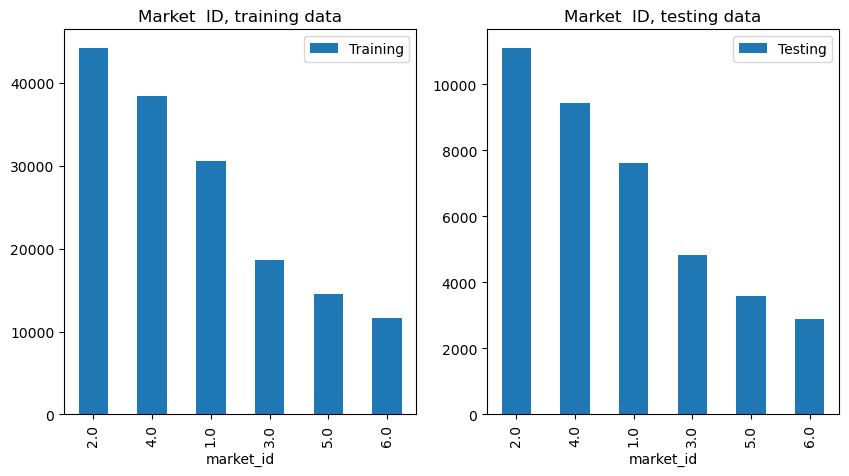

In [78]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

X_train.market_id.value_counts().plot(kind = "bar", ax=ax[0], label='Training')
ax[0].legend()
ax[0].set_title("Market  ID, training data")
X_test.market_id.value_counts().plot(kind = "bar", ax=ax[1], label='Testing')
ax[1].legend()
ax[1].set_title("Market  ID, testing data")
plt.show()

##### plot 2

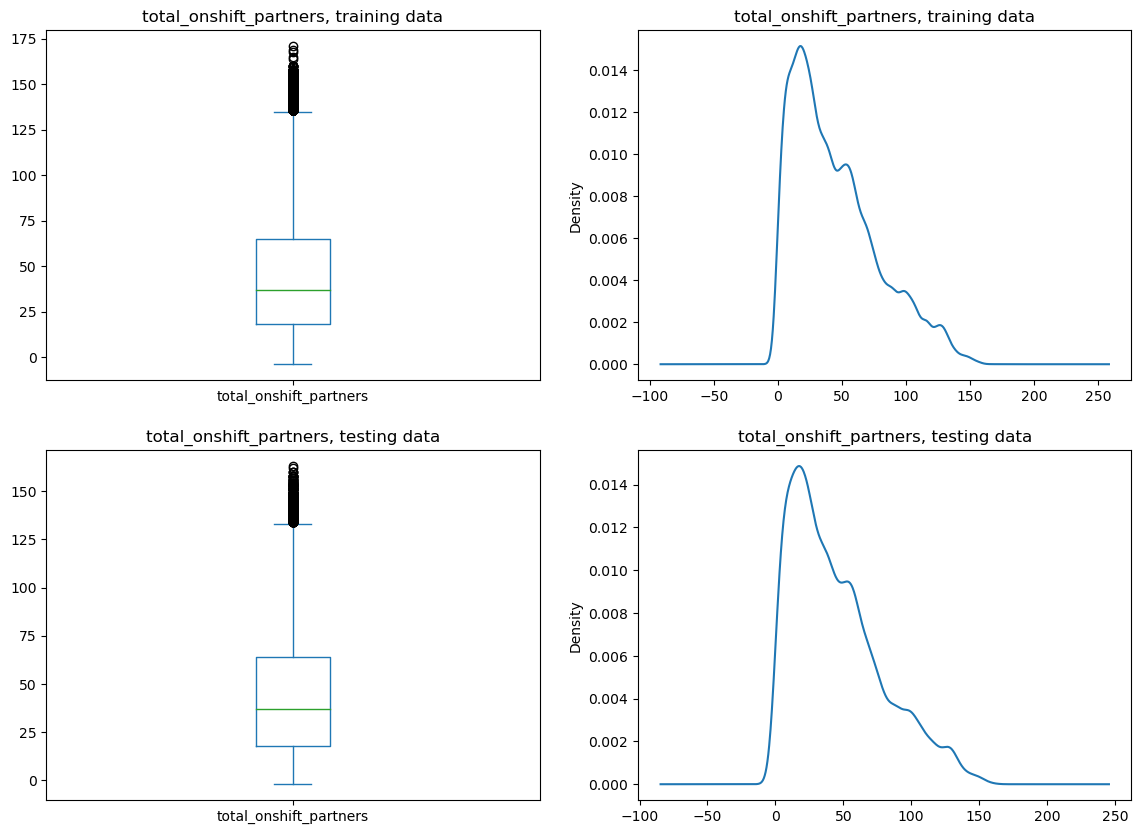

In [79]:
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

X_train.total_onshift_partners.plot(kind = "box", ax=ax[0][0])
ax[0][0].set_title("total_onshift_partners, training data")
X_test.total_onshift_partners.plot(kind = "box", ax=ax[1][0])
ax[1][0].set_title("total_onshift_partners, testing data")

X_train.total_onshift_partners.plot(kind = "kde", ax=ax[0][1])
ax[0][1].set_title("total_onshift_partners, training data")
X_test.total_onshift_partners.plot(kind = "kde", ax=ax[1][1])
ax[1][1].set_title("total_onshift_partners, testing data")
plt.show()

##### plot 3

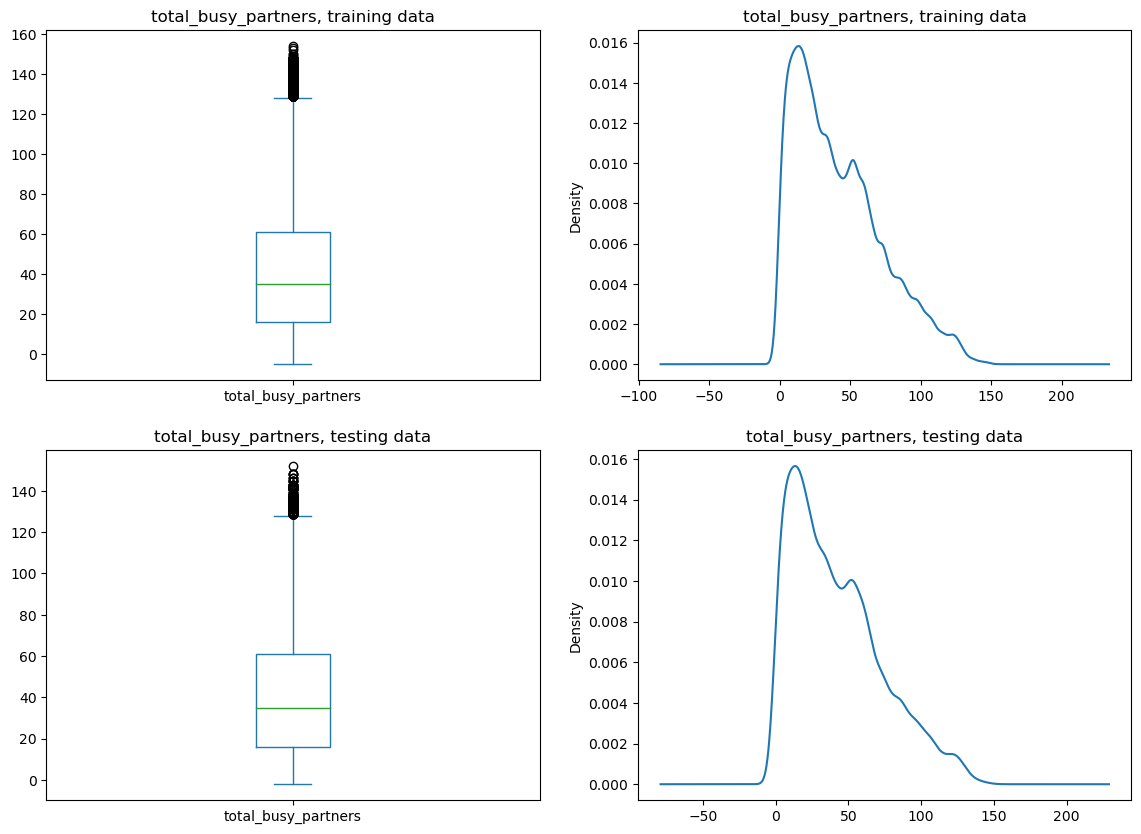

In [80]:
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

X_train.total_busy_partners.plot(kind = "box", ax=ax[0][0])
ax[0][0].set_title("total_busy_partners, training data")
X_test.total_busy_partners.plot(kind = "box", ax=ax[1][0])
ax[1][0].set_title("total_busy_partners, testing data")

X_train.total_busy_partners.plot(kind = "kde", ax=ax[0][1])
ax[0][1].set_title("total_busy_partners, training data")
X_test.total_busy_partners.plot(kind = "kde", ax=ax[1][1])
ax[1][1].set_title("total_busy_partners, testing data")
plt.show()

##### plot 4

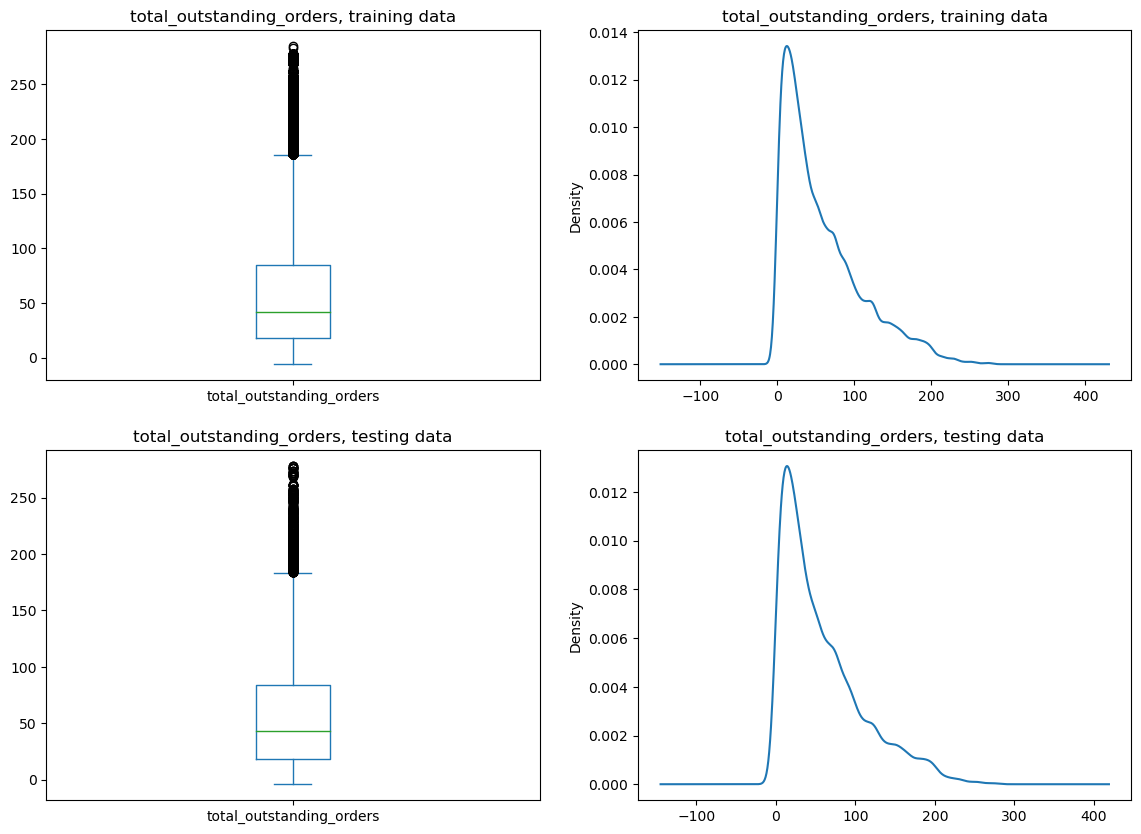

In [81]:
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

X_train.total_outstanding_orders.plot(kind = "box", ax=ax[0][0])
ax[0][0].set_title("total_outstanding_orders, training data")
X_test.total_outstanding_orders.plot(kind = "box", ax=ax[1][0])
ax[1][0].set_title("total_outstanding_orders, testing data")

X_train.total_outstanding_orders.plot(kind = "kde", ax=ax[0][1])
ax[0][1].set_title("total_outstanding_orders, training data")
X_test.total_outstanding_orders.plot(kind = "kde", ax=ax[1][1])
ax[1][1].set_title("total_outstanding_orders, testing data")
plt.show()

### outlier detection

In [131]:
num_cols = ["total_items", "subtotal", "num_distinct_items", "min_item_price", "max_item_price", "total_onshift_partners", "total_busy_partners", "total_outstanding_orders"]

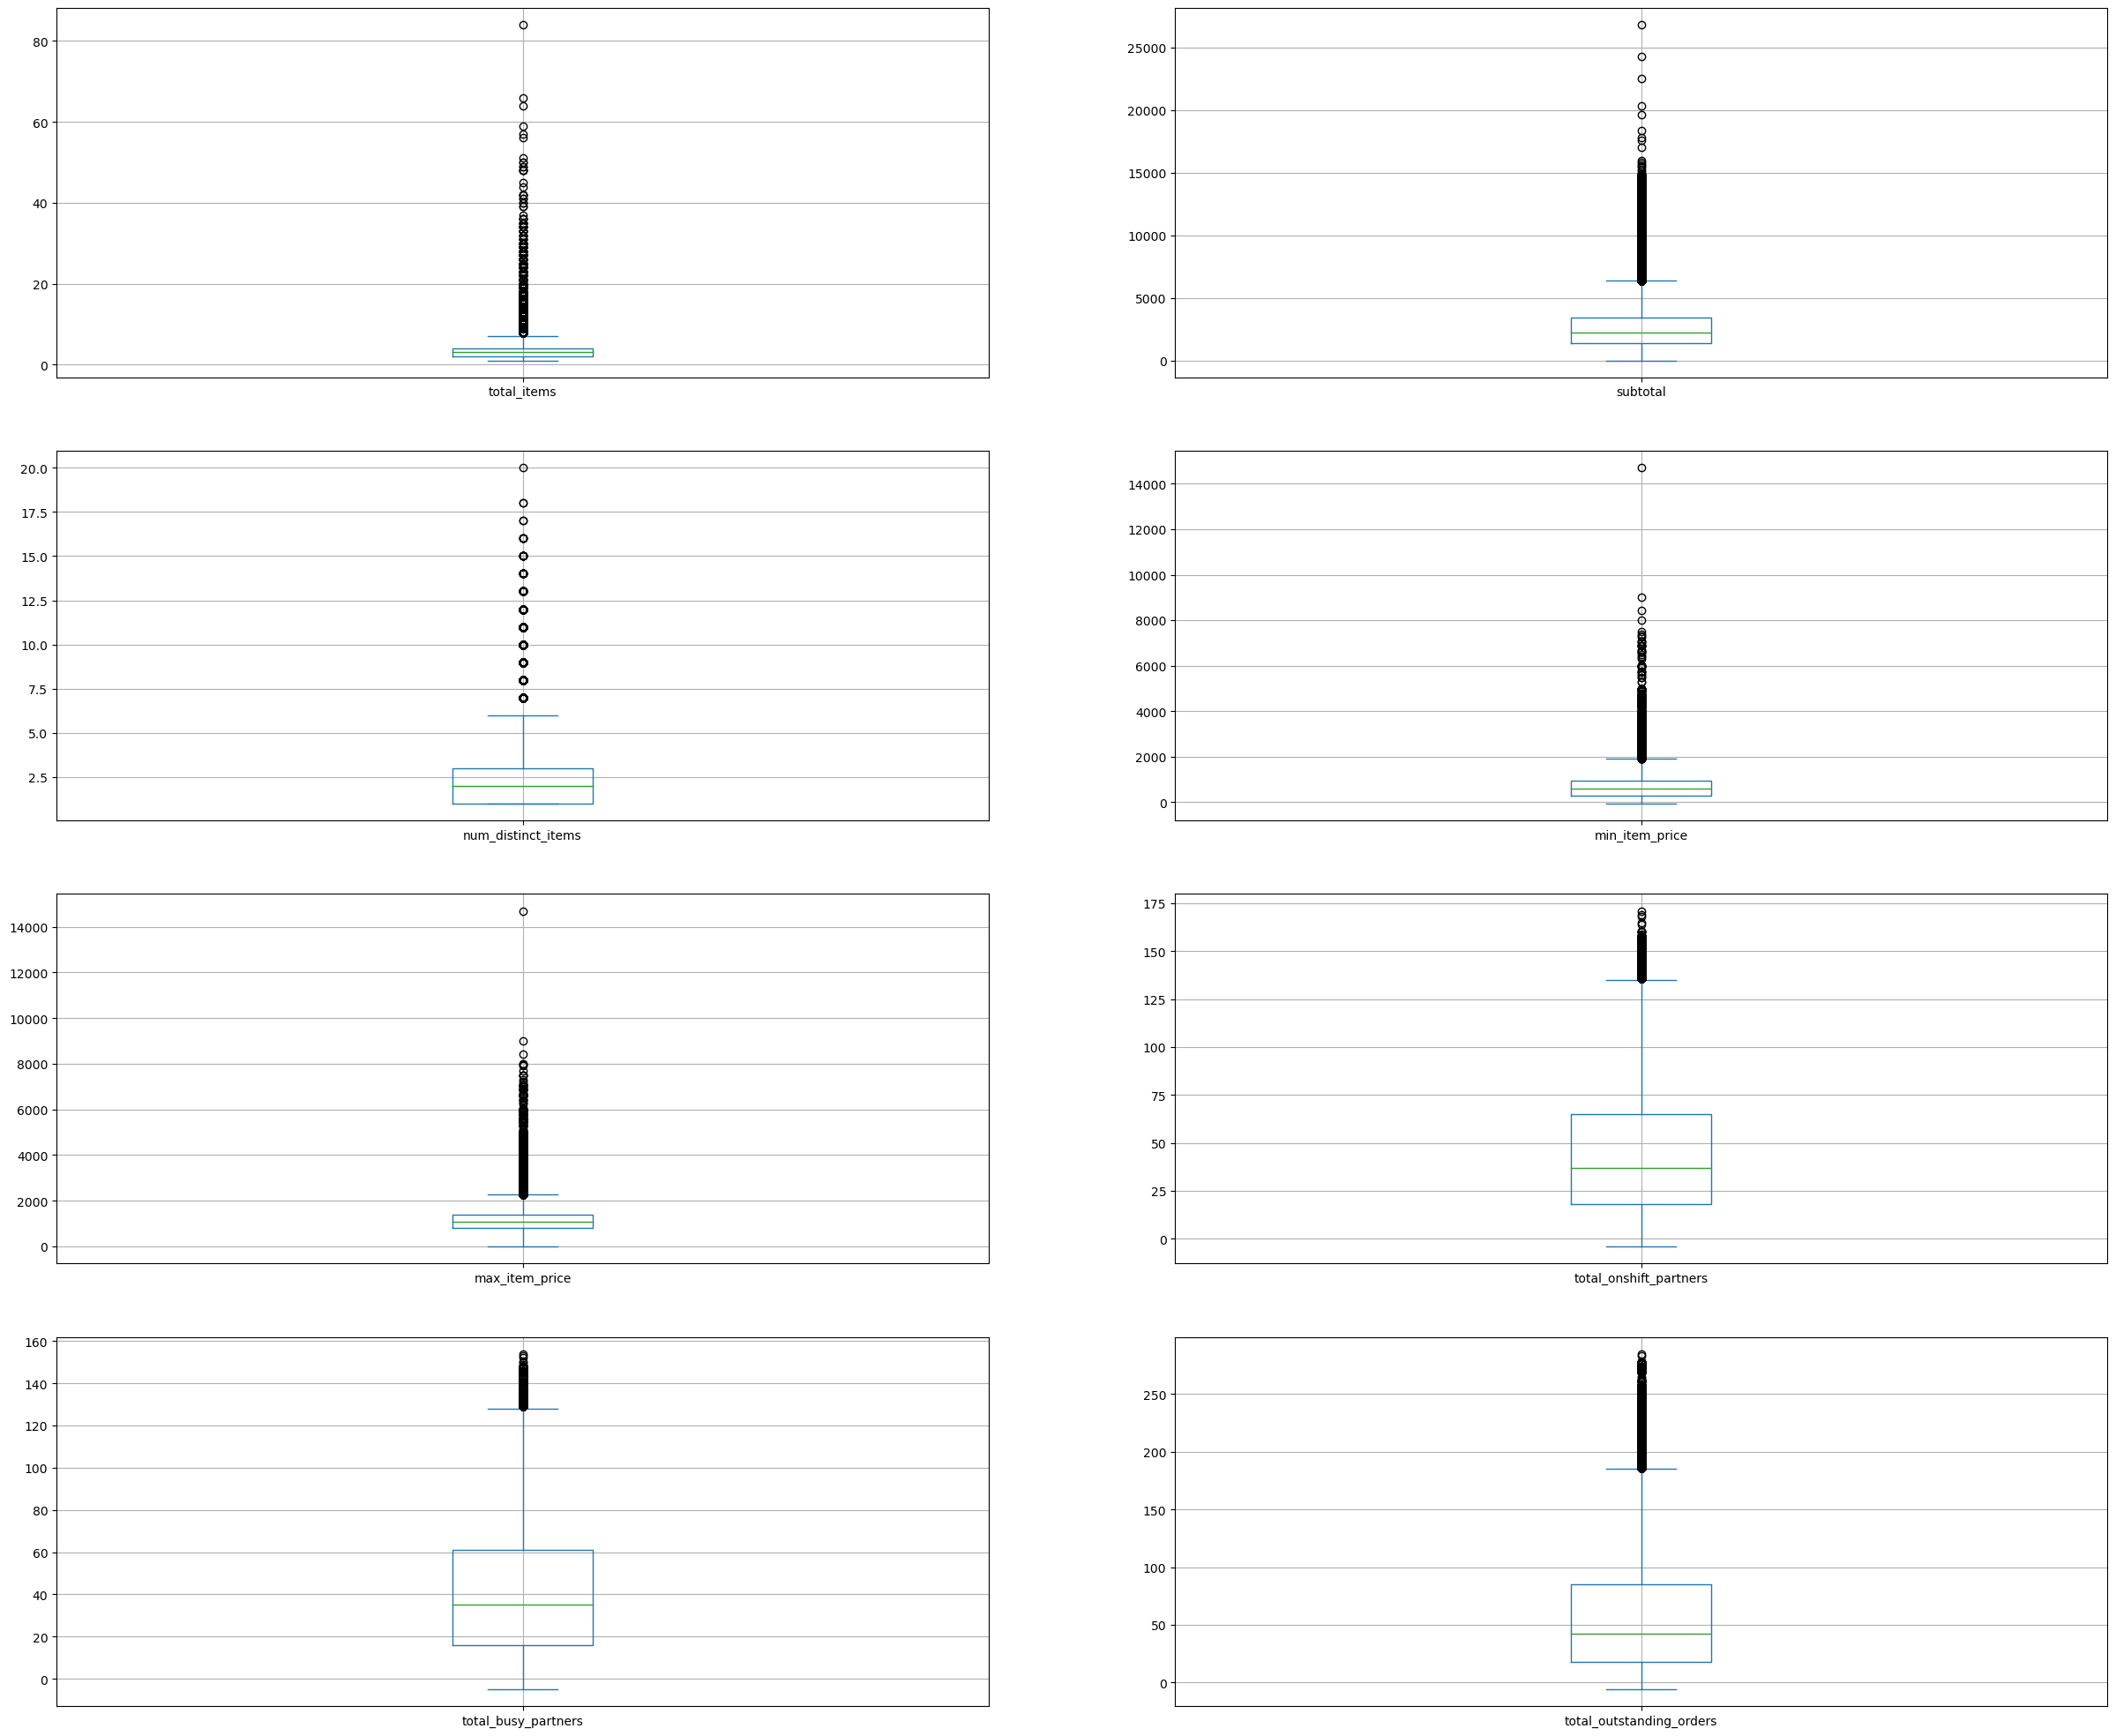

In [132]:
fig, ax = plt.subplots(4, 2, figsize=(30, 25))
row, col = 0,0

for feature in num_cols:
    X_train[feature].plot(kind = "box", label = feature, grid = True, ax = ax[row][col])
    col += 1
    col = col % 2
    if col == 0:
        row += 1

<Axes: >

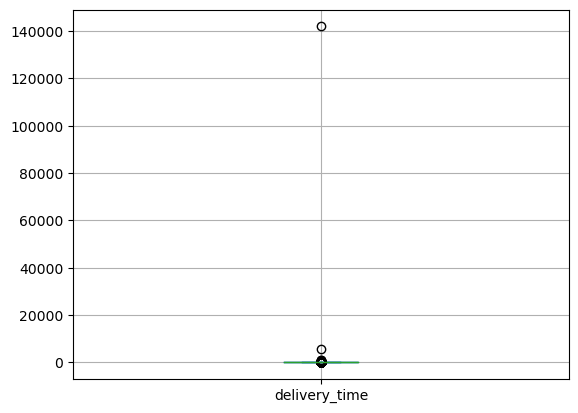

In [133]:
y_train.plot(kind = "box", label = "delivery_time", grid = True)

In [134]:
X_train.columns

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders', 'created_at_month', 'created_at_weekday',
       'created_at_hour', 'actual_delivery_month', 'actual_deliveryt_weekday',
       'actual_delivery_hour'],
      dtype='object')

In [28]:
X_train.drop(["created_at", "actual_delivery_time", "actual_delivery_month", "created_at_month", "actual_deliveryt_weekday", "actual_delivery_hour"], axis= 1, inplace=True)

In [29]:
X_test.drop(["created_at", "actual_delivery_time", "actual_delivery_month", "created_at_month", "actual_deliveryt_weekday", "actual_delivery_hour"], axis= 1, inplace=True)

In [30]:
train = pd.concat([X_train.reset_index(drop = True), y_train.reset_index(drop = True)], axis = 1)

In [31]:
from category_encoders import TargetEncoder
cols = [col for col in X_train.columns if df[col].nunique() <= 24 or df[col].dtype == "O"]
print(cols)

['market_id', 'store_id', 'store_primary_category', 'order_protocol', 'num_distinct_items', 'created_at_weekday', 'created_at_hour']


In [32]:
te = TargetEncoder(cols = cols)
te.fit(X_train, y_train)

X_train = te.transform(X_train)
X_test = te.transform(X_test)


In [33]:
# from sklearn.neighbors import LocalOutlierFactor
# clf = LocalOutlierFactor(n_neighbors=20)
# train["is_inlier"] = clf.fit_predict(train)
# # df['is_outlier_lof'] = clf

In [34]:
# after_lof = train[train.is_inlier == 1]

In [35]:
# fig, ax = plt.subplots(4, 2, figsize=(30, 25))
# row, col = 0,0

# for feature in num_cols:
#     after_lof[feature].plot(kind = "box", label = feature, grid = True, ax = ax[row][col])
#     col += 1
#     col = col % 2
#     if col == 0:
#         row += 1

In [36]:
# X_train = train.drop(["delivery_time", "is_inlier"], axis = 1)
# y_train = train.delivery_time

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [38]:
X_test_sca = scaler.transform(X_test)

In [39]:
X_train_sca = scaler.transform(X_train)

In [40]:
# X_train, X_val, y_train, y_val = train_test_split(X_train_sca, y_train, test_size = 0.2, random_state = 11)

In [41]:
# print(f"the shape of train data : ")
# print(f"   X_train = {X_train.shape}\n   y_train = {y_train.shape}")
# print("--" * 20)
# print(f"the shape of test data : ")
# # print(f"   X_test = {X_val.shape}\n   y_test = {y_val.shape}")
# print("--" * 60)

In [42]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [43]:
L2Reg = tf.keras.regularizers.L2(l2=1e-6)
model = Sequential([
    Dense(10, input_shape = (X_train.shape[1],), activation = "relu", kernel_regularizer = L2Reg ),
    Dropout(0.3),
    # Dense(128, activation = "relu", kernel_regularizer = L2Reg ),
    # Dropout(0.3),
    # Dense(64, activation = "relu", kernel_regularizer = L2Reg ),
    # Dropout(0.3),
    # Dense(4, activation = "relu", kernel_regularizer = L2Reg ),
    # Dropout(0.3),
    Dense(1, activation = "linear")
])

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                150       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 161 (644.00 Byte)
Trainable params: 161 (644.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
# from tensorflow.keras.utils import plot_model

# plot_model(model,
#     to_file='model.png',
#     show_shapes=True, show_layer_names=True)

In [46]:
from tensorflow.keras.metrics import R2Score 

model.compile(
    optimizer = "adam", # stochastic gradient descent, adam, rmsprop, adadelts
    loss = "mean_squared_error", # sigmoid loss, # mean_squared_error, categorical_crossentropy, sparse_categorical_crossentropy, binary_crossentropy
    metrics = [R2Score(),'mae']
)

In [47]:
# EarlyStoppingCallback = tf.keras.callbacks.EarlyStopping(monitor='val_r2_score', patience=50,  restore_best_weights=True, verbose=1)
# ModelCheckpointCallback = tf.keras.callbacks.ModelCheckpoint(filepath='tf_model.h5',
#                                                              monitor='val_r2_score',
#                                                              save_best_only=True,
#                                                              mode='max', verbose = 1)

In [48]:
# from tensorflow.keras.callbacks import TensorBoard

# now = datetime.now()
# log_folder = "tf_logs/.../" + now.strftime("%Y%m%d-%H%M%S") + "/"

# tb_callback = TensorBoard(log_dir=log_folder, histogram_freq=1)

In [49]:
history = model.fit(X_train_sca, y_train, validation_split= 0.2,  epochs=100, batch_size=256, verbose=1)

Epoch 1/100
494/494 [==============================] - 1s 1ms/step - loss: 2573.0613 - r2_score: -3.1753 - mae: 44.0812 - val_loss: 639286.6250 - val_r2_score: -0.0023 - val_mae: 43.1477
Epoch 2/100
494/494 [==============================] - 0s 847us/step - loss: 1665.3395 - r2_score: -1.7023 - mae: 31.4753 - val_loss: 637526.0000 - val_r2_score: 4.1395e-04 - val_mae: 27.9382
Epoch 3/100
494/494 [==============================] - 0s 793us/step - loss: 1121.6091 - r2_score: -0.8200 - mae: 22.5971 - val_loss: 636700.1250 - val_r2_score: 0.0017 - val_mae: 21.6027
Epoch 4/100
494/494 [==============================] - 0s 857us/step - loss: 973.5938 - r2_score: -0.5798 - mae: 20.1956 - val_loss: 636526.3125 - val_r2_score: 0.0020 - val_mae: 19.7286
Epoch 5/100
494/494 [==============================] - 0s 791us/step - loss: 912.2208 - r2_score: -0.4802 - mae: 19.1757 - val_loss: 636579.7500 - val_r2_score: 0.0019 - val_mae: 18.8822
Epoch 6/100
494/494 [==============================] - 0s 7

In [347]:
# model=Sequential()
# model.add(Dense(14,input_shape = (X_train.shape[1],),activation='relu'))
# model.add(Dense(512,activation='relu'))
# model.add(Dense(1024,activation='relu'))
# model.add(Dense(256,activation='relu'))
# model.add(Dense(1,activation='linear'))


# from tensorflow.keras.optimizers.legacy import Adam
# adam=Adam(learning_rate=0.01)
# model.compile(loss='mse',optimizer=adam,metrics=['mse','mae'])
# history=model.fit(X_train, y_train, validation_split = 0.2,  epochs=5, batch_size=512, verbose=1)

In [348]:
# model = Sequential([
#     Dense(64, activation='relu', kernel_initializer='normal', input_shape=(X_train.shape[1],)),
#     Dense(516, activation='relu'),
#     Dense(1024,activation='relu'),
#     Dense(256,activation='relu'),
#     Dense(1,activation='linear') # Since it's a regression task, use 1 output neuron
# ])

# adam=Adam(learning_rate=0.01)
# model.compile(loss='mse',optimizer=adam,metrics=['mse','mae'])

# ##Training the neural network for required amount of epochs
# history=model.fit(X_train,y_train,epochs=7,batch_size=512,verbose=1,validation_split=0.2)

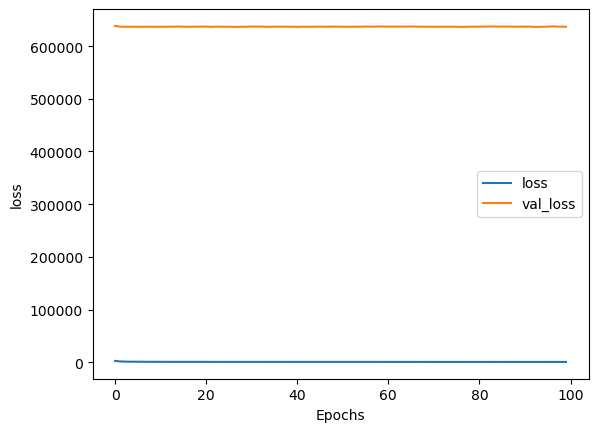

In [375]:
def plot_history(history,key):
    plt.plot(history.history[key])
    plt.plot(history.history['val_'+key])
    plt.xlabel("Epochs")
    plt.ylabel(key)
    plt.legend([key,'val_'+key])
    plt.show()
#plot the history
plot_history(history,'loss')

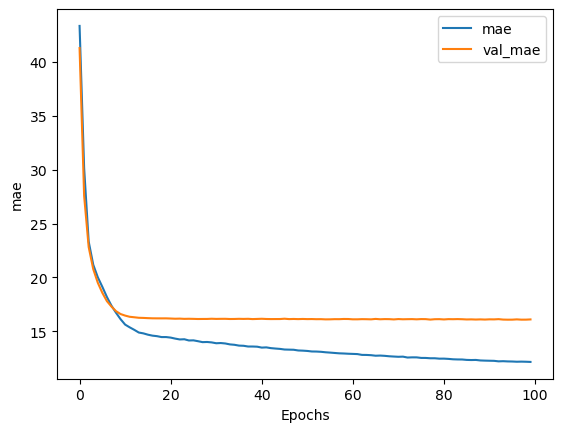

In [376]:
plot_history(history,'mae')

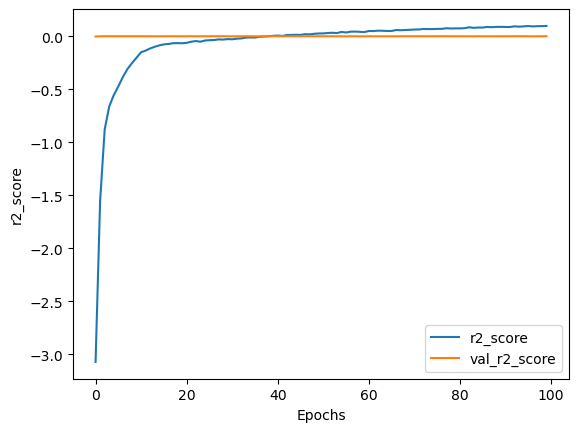

In [377]:
plot_history(history,'r2_score')

In [331]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error 
z= model.predict(X_test)
r2_score(y_test, z)

1234/1234 [==============================] - 1s 1ms/step


0.06319108149689556

In [332]:
mse = mean_squared_error(y_test, z)
rmse = mse**.5
print("mse : ",mse)
print("rmse : ",rmse)
print("errors for neural net")
mae = mean_absolute_error(y_test, z)
print("mae : ",mae)

mse :  1265.1548703136787
rmse :  35.56901559382377
errors for neural net
mae :  11.840953317324765


In [333]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, z)

0.26754590421219177